In [1]:
import tensorflow as tf



In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = [] # List to store paths of images
    labels = [] # List to store paths of images

    # Loop through each label (subdirectory) in the given directory
    for label in os.listdir(dir):
        # Loop through each image in the label's subdirectory
        for imagename in os.listdir(os.path.join(dir,label)):
            # Construct the full path to the image and add it to the image_paths list
            image_paths.append(os.path.join(dir,label,imagename))
             # Add the label corresponding to the image to the labels list
            labels.append(label)
        print(label, "completed") # Print the completion status for the label
    return image_paths,labels # Return the lists of image paths and labels


In [5]:
train = pd.DataFrame() 
train['image'], train['label'] = createdataframe(TRAIN_DIR) # Populate the DataFrame with image paths and labels

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                             image     label
0         images/train\angry\Training_10118481.jpg     angry
1         images/train\angry\Training_10120469.jpg     angry
2         images/train\angry\Training_10131352.jpg     angry
3         images/train\angry\Training_10161559.jpg     angry
4          images/train\angry\Training_1021836.jpg     angry
...                                            ...       ...
28704  images/train\surprise\Training_99916297.jpg  surprise
28705  images/train\surprise\Training_99924420.jpg  surprise
28706  images/train\surprise\Training_99937001.jpg  surprise
28707  images/train\surprise\Training_99951755.jpg  surprise
28708  images/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                             image     label
0       images/test\angry\PrivateTest_10131363.jpg     angry
1       images/test\angry\PrivateTest_10304478.jpg     angry
2        images/test\angry\PrivateTest_1054527.jpg     angry
3       images/test\angry\PrivateTest_10590091.jpg     angry
4        images/test\angry\PrivateTest_1109992.jpg     angry
...                                            ...       ...
7173  images/test\surprise\PublicTest_98089595.jpg  surprise
7174  images/test\surprise\PublicTest_98567249.jpg  surprise
7175  images/test\surprise\PublicTest_98972870.jpg  surprise
7176  images/test\surprise\PublicTest_99242645.jpg  surprise
7177  images/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         images/test\angry\PrivateTest_10131363.jpg
1         images/test\angry\PrivateTest_10304478.jpg
2          images/test\angry\PrivateTest_1054527.jpg
3         images/test\angry\PrivateTest_10590091.jpg
4          images/test\angry\Pr

In [9]:
from tqdm.notebook import tqdm

In [10]:
from tensorflow.keras.preprocessing.image import load_img


In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        # Load the image in grayscale
        img = load_img(image, color_mode="grayscale", target_size=(48, 48))
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # Reshape to (num_samples, 48, 48, 1) for grayscale images if not already in this shape
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [12]:
# def extract_features(images):
#     features = []
#     for image in tqdm(images):
#         img = load_img(image,grayscale =  True )
#         img = np.array(img)
#         features.append(img)
#     features = np.array(features)
#     features = features.reshape(len(features),48,48,1)
#     return features
    

In [13]:
# calling the extract_features function with the image paths from train DataFrame
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [14]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [15]:
# normalizing the image feature arrays for training and testing datasets.
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [18]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [20]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

# Convolutional Layers
model.add(Conv2D(128, kernel_size=(3, 3), activation=None, input_shape=(48, 48, 1)))
model.add(BatchNormalization())  # Add BN
model.add(tf.keras.layers.ReLU())  # Apply activation after BN
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation=None))
model.add(BatchNormalization())  # Add BN
model.add(tf.keras.layers.ReLU())  # Apply activation after BN
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation=None))
model.add(BatchNormalization())  # Add BN
model.add(tf.keras.layers.ReLU())  # Apply activation after BN
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation=None))
model.add(BatchNormalization())  # Add BN
model.add(tf.keras.layers.ReLU())  # Apply activation after BN
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation=None))
model.add(BatchNormalization())  # Add BN
model.add(tf.keras.layers.ReLU())  # Apply activation after BN
model.add(Dropout(0.4))

model.add(Dense(256, activation=None))
model.add(BatchNormalization())  # Add BN
model.add(tf.keras.layers.ReLU())  # Apply activation after BN
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(7, activation='softmax'))  # Softmax directly outputs probabilities


d:\Program Files\anaconda3\envs\new_tf_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# configuring the compilation of a machine learning model using the Keras API
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [22]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
# 1. Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pickle

# 2. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# 3. Fit the data generator on training data
datagen.fit(x_train)

# 4. Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 5. Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=5, 
    min_lr=1e-6, 
    verbose=1
)

# 6. Train the model using augmented data with both EarlyStopping and learning rate scheduler
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),  # Augmented data flow
    validation_data=(x_test, y_test),
    epochs=100,
    callbacks=[early_stopping, lr_scheduler],  # Both EarlyStopping and LR Scheduler
    verbose=1
)

# 7. Save the training history to a file for future use
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


d:\Program Files\anaconda3\envs\new_tf_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 621s 3s/step - accuracy: 0.2113 - loss: 2.0442 - val_accuracy: 0.2471 - val_loss: 1.8432 - learning_rate: 0.0010
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 523s 2s/step - accuracy: 0.2743 - loss: 1.7832 - val_accuracy: 0.2476 - val_loss: 1.8920 - learning_rate: 0.0010
Epoch 3/100
202/225 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.3577 - loss: 1.6161

In [ ]:
# model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.3548 - loss: 1.6178 - val_accuracy: 0.4444 - val_loss: 1.4386
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - accuracy: 0.4118 - loss: 1.5141 - val_accuracy: 0.4670 - val_loss: 1.3963
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 517s 2s/step - accuracy: 0.4390 - loss: 1.4495 - val_accuracy: 0.4928 - val_loss: 1.3248
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.4607 - loss: 1.3993 - val_accuracy: 0.5214 - val_loss: 1.2640
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.4811 - loss: 1.3499 - val_accuracy: 0.5269 - val_loss: 1.2347
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.4975 - loss: 1.3143 - val_accuracy: 0.5443 - val_loss: 1.2141
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.5108 - loss: 1.2873 - val_accuracy: 0.5481 - val_loss: 1.2062
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.5239 - loss: 1.2555 - 

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5") 

### Loading the saved model for accuracy test

In [ ]:
# Load training history
import pickle
with open('training_history.pkl', 'rb') as file:
    history = pickle.load(file)

# Plot training & validation accuracy/loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
from keras.models import model_from_json

In [ ]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [ ]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class indices
y_true_classes = y_test.argmax(axis=1)  # Convert one-hot encoded labels to class indices

# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label))


225/225 ━━━━━━━━━━━━━━━━━━━━ 38s 155ms/step
Accuracy: 0.8605
Precision: 0.8618
Recall: 0.8605
F1 Score: 0.8595

Classification Report:
              precision    recall  f1-score   support

       angry       0.84      0.81      0.83       958
     disgust       0.92      0.86      0.89       111
        fear       0.85      0.75      0.79      1024
       happy       0.94      0.95      0.94      1774
     neutral       0.78      0.90      0.84      1233
         sad       0.85      0.78      0.81      1247
    surprise       0.87      0.94      0.90       831

    accuracy                           0.86      7178
   macro avg       0.86      0.85      0.86      7178
weighted avg       0.86      0.86      0.86      7178



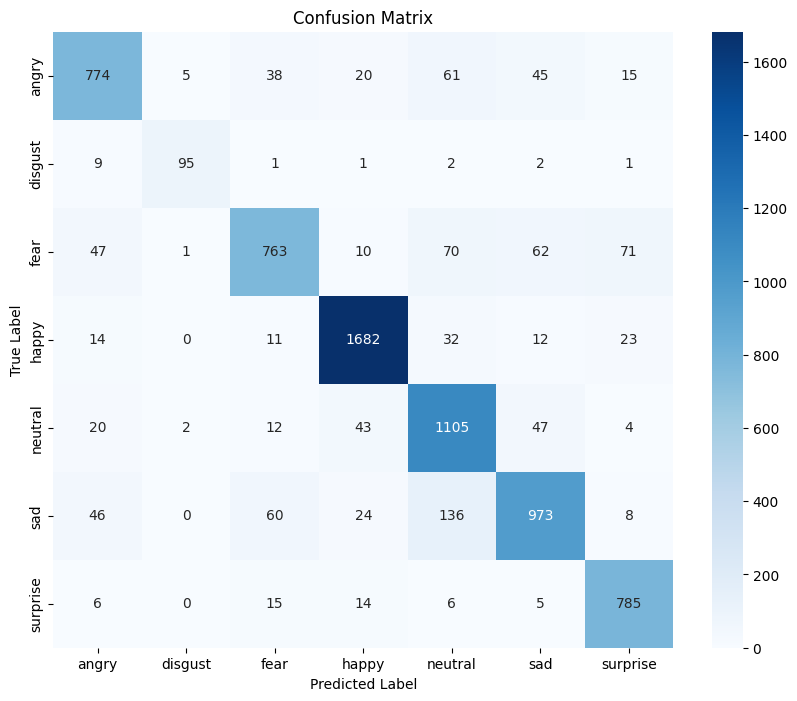

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
def ef(image):
    img = load_img(image,color_mode='grayscale' )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
model prediction is  sad


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model prediction is  sad


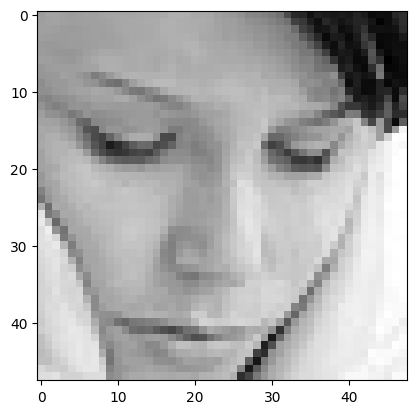

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  sad


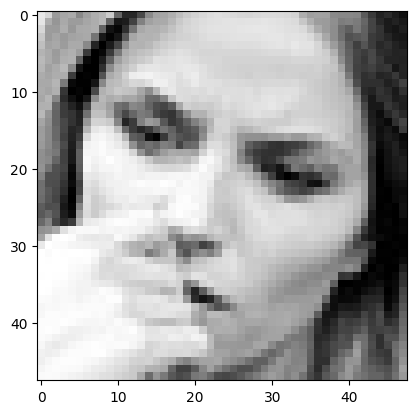

In [ ]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is  disgust


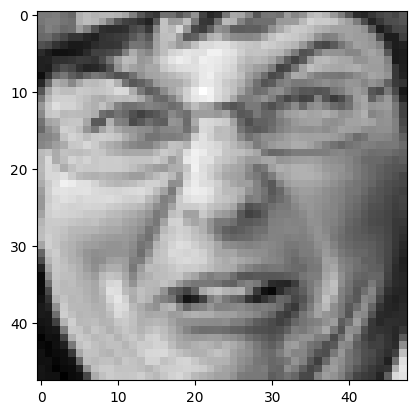

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
model prediction is  happy


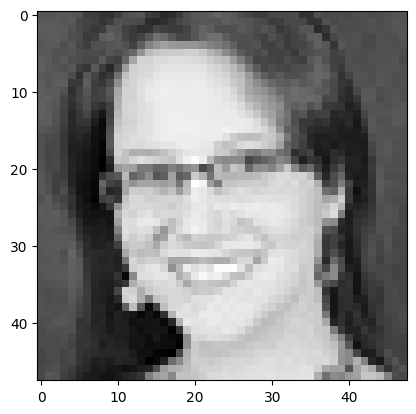

In [ ]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
model prediction is  surprise


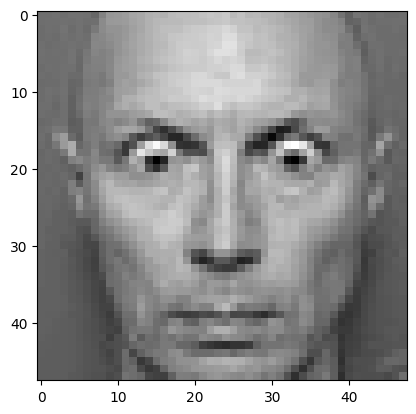

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 32s 132ms/step - accuracy: 0.8366 - loss: 0.5310
Test Loss: 0.474412202835083
Test Accuracy: 0.8605461120605469


225/225 ━━━━━━━━━━━━━━━━━━━━ 31s 139ms/step - accuracy: 0.8010 - loss: 0.6082


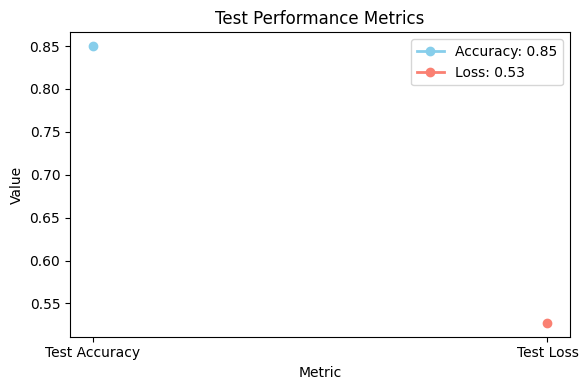

Test Loss: 0.5273001194000244
Test Accuracy: 0.8498188853263855


In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Create a line plot for test performance metrics
plt.figure(figsize=(6, 4))

# Create a line for Test Accuracy and Test Loss
plt.plot(['Test Accuracy'], [test_accuracy], marker='o', color='skyblue', label=f'Accuracy: {test_accuracy:.2f}', linewidth=2)
plt.plot(['Test Loss'], [test_loss], marker='o', color='salmon', label=f'Loss: {test_loss:.2f}', linewidth=2)

# Add labels, title, and legend
plt.title('Test Performance Metrics')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.legend()

plt.tight_layout()
plt.show()

# Print the test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step - accuracy: 0.8010 - loss: 0.6082


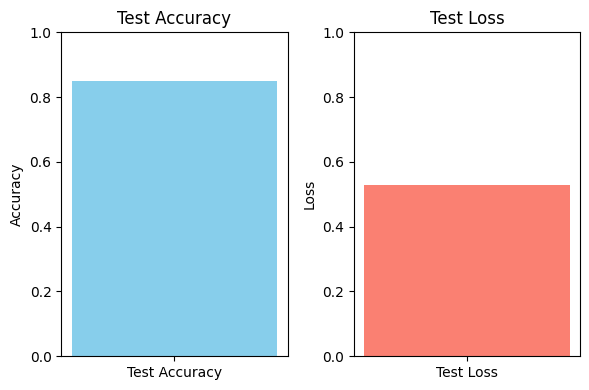

Test Loss: 0.5273001194000244
Test Accuracy: 0.8498188853263855


In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Create a figure to display the test accuracy and loss
plt.figure(figsize=(6, 4))

# Plot the test accuracy
plt.subplot(1, 2, 1)
plt.bar(['Test Accuracy'], [test_accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Test Accuracy')

# Plot the test loss
plt.subplot(1, 2, 2)
plt.bar(['Test Loss'], [test_loss], color='salmon')
plt.ylim(0, 1)
plt.ylabel('Loss')
plt.title('Test Loss')

plt.tight_layout()
plt.show()

# Print the test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 135ms/step - accuracy: 0.8010 - loss: 0.6082


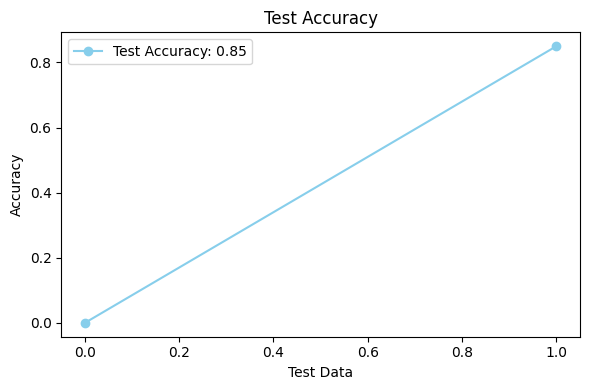

Test Loss: 0.5273001194000244
Test Accuracy: 0.8498188853263855


In [ ]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Create a simple line plot for the final test accuracy
plt.figure(figsize=(6, 4))

# Plot a line for the Test Accuracy
plt.plot([0, 1], [0, test_accuracy], marker='o', color='skyblue', label=f'Test Accuracy: {test_accuracy:.2f}')

# Add labels and title
plt.title('Test Accuracy')
plt.xlabel('Test Data')
plt.ylabel('Accuracy')

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print the test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# import matplotlib.pyplot as plt

# # Train the model and save the training history
# history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

# # Plot training & validation accuracy values
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='upper left')

# plt.tight_layout()
# plt.show()


Epoch 1/100
 89/225 ━━━━━━━━━━━━━━━━━━━━ 4:02 2s/step - accuracy: 0.7038 - loss: 0.8468

KeyboardInterrupt: 